In [15]:
import random as rd

INF = 10000000

def generate_matrix(n, min_weight, max_weight):
    return [[rd.randint(min_weight, max_weight) for x in range(n)] for y in range(n)] 

In [16]:
import graphviz

def draw_graph(graph,n):
    #dot = graphviz.Digraph(comment='Nada')
    dot = graphviz.Digraph(comment='')
    for i in range(n):
        for j in range(n):
            weight = graph[i][j]
            if weight != INF and weight != 0: 
                dot.edge(str(i), str(j), label=str(weight))
    dot.graph_attr['rankdir'] = 'BT'
    return dot

In [17]:
def bfs(graph, n, source, target, parent):
    queue = []
    visited = [False]*n

    queue.append(source)

    while len(queue)> 0:
        vertex = queue.pop()
        visited[vertex] = True
        
        for i in range(n):
            # If the edge exit and thw weight is not 0(0 flow or is an edge to itself) and the target have not been visited
            if graph[vertex][i] != None and visited[i] == False and graph[vertex][i]!=0:
                parent[i] = vertex
                queue.append(i)

    return visited[target]


def ford_fulkerson(graph, n, source, target):
    parent = [None]*n
    residual_graph = [[None for i in range(n)] for j in range(n)]
    max_flow = 0
    paths = []

    for i in range(n):
        for j in range(n):
            residual_graph[i][j] = graph[i][j]

    while bfs(residual_graph,n,source,target,parent):
        path_flow = INF

        aux_target = target
        while aux_target != source:
            aux_parent = parent[aux_target]
            #Find the minimos flow in the path
            path_flow = min(path_flow, residual_graph[aux_parent][aux_target])
            aux_target = aux_parent

        aux_target = target
        while aux_target != source:
            aux_parent = parent[aux_target]
            # Reduce the residual flow in edge(parent, target) 
            residual_graph[aux_parent][aux_target] -= path_flow
            # Augment the reverse flow in edge(target, parent) 
            residual_graph[aux_target][aux_parent] += path_flow
            aux_target = aux_parent

        max_flow += path_flow

        aux_parent = [None]*n
        for i in range(n):
            aux_parent[i] = parent[i]    

        paths.append((aux_parent, path_flow))

        print(residual_graph)

    return [max_flow, paths]
    

[[0, 16, 9, 0, 0, 0], [0, 0, 10, 12, 0, 0], [4, 4, 0, 0, 10, 0], [0, 0, 9, 0, 0, 20], [0, 0, 4, 7, 0, 0], [0, 0, 0, 0, 4, 0]]
[[0, 16, 2, 0, 0, 0], [0, 0, 10, 12, 0, 0], [11, 4, 0, 0, 3, 0], [0, 0, 9, 0, 7, 13], [0, 0, 11, 0, 0, 0], [0, 0, 0, 7, 4, 0]]
[[0, 16, 0, 0, 0, 0], [0, 0, 12, 10, 0, 0], [13, 2, 0, 0, 3, 0], [0, 2, 9, 0, 7, 11], [0, 0, 11, 0, 0, 0], [0, 0, 0, 9, 4, 0]]
[[0, 6, 0, 0, 0, 0], [10, 0, 12, 0, 0, 0], [13, 2, 0, 0, 3, 0], [0, 12, 9, 0, 7, 1], [0, 0, 11, 0, 0, 0], [0, 0, 0, 19, 4, 0]]
[23, [([None, 2, 0, 4, 2, 4], 4), ([None, 2, 0, 4, 2, 3], 7), ([None, 2, 0, 1, 2, 3], 2), ([None, 0, 4, 1, 5, 3], 10)]]


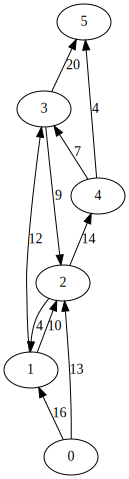

In [18]:
graph = [[0, 16, 13, 0, 0, 0], 
        [0, 0, 10, 12, 0, 0], 
        [0, 4, 0, 0, 14, 0], 
        [0, 0, 9, 0, 0, 20], 
        [0, 0, 0, 7, 0, 4], 
        [0, 0, 0, 0, 0, 0]] 

source = 0
target = 5

print(ford_fulkerson(graph,6,source,target))
draw_graph(graph,6)
  